 Librerías cargadas y configuradas
Data loaded successfully!
    age  annual_income  spending_score  online_visits_per_month  \
0  40.0       50403.82            52.3                     11.6   
1  33.6       52783.90            52.1                      7.6   
2  41.5       53233.89            33.9                     10.7   
3  50.2       74392.60            63.0                     11.2   
4  32.7       82070.34            34.3                     11.7   

   avg_cart_value  product_categories_visited  days_since_last_purchase  \
0           73.34                           4                      33.5   
1           89.09                           1                      79.1   
2          103.12                           4                     106.3   
3           94.85                           4                       5.6   
4           64.99                           4                       3.2   

   customer_tenure_mths  
0                  16.4  
1                   6.1  
2      

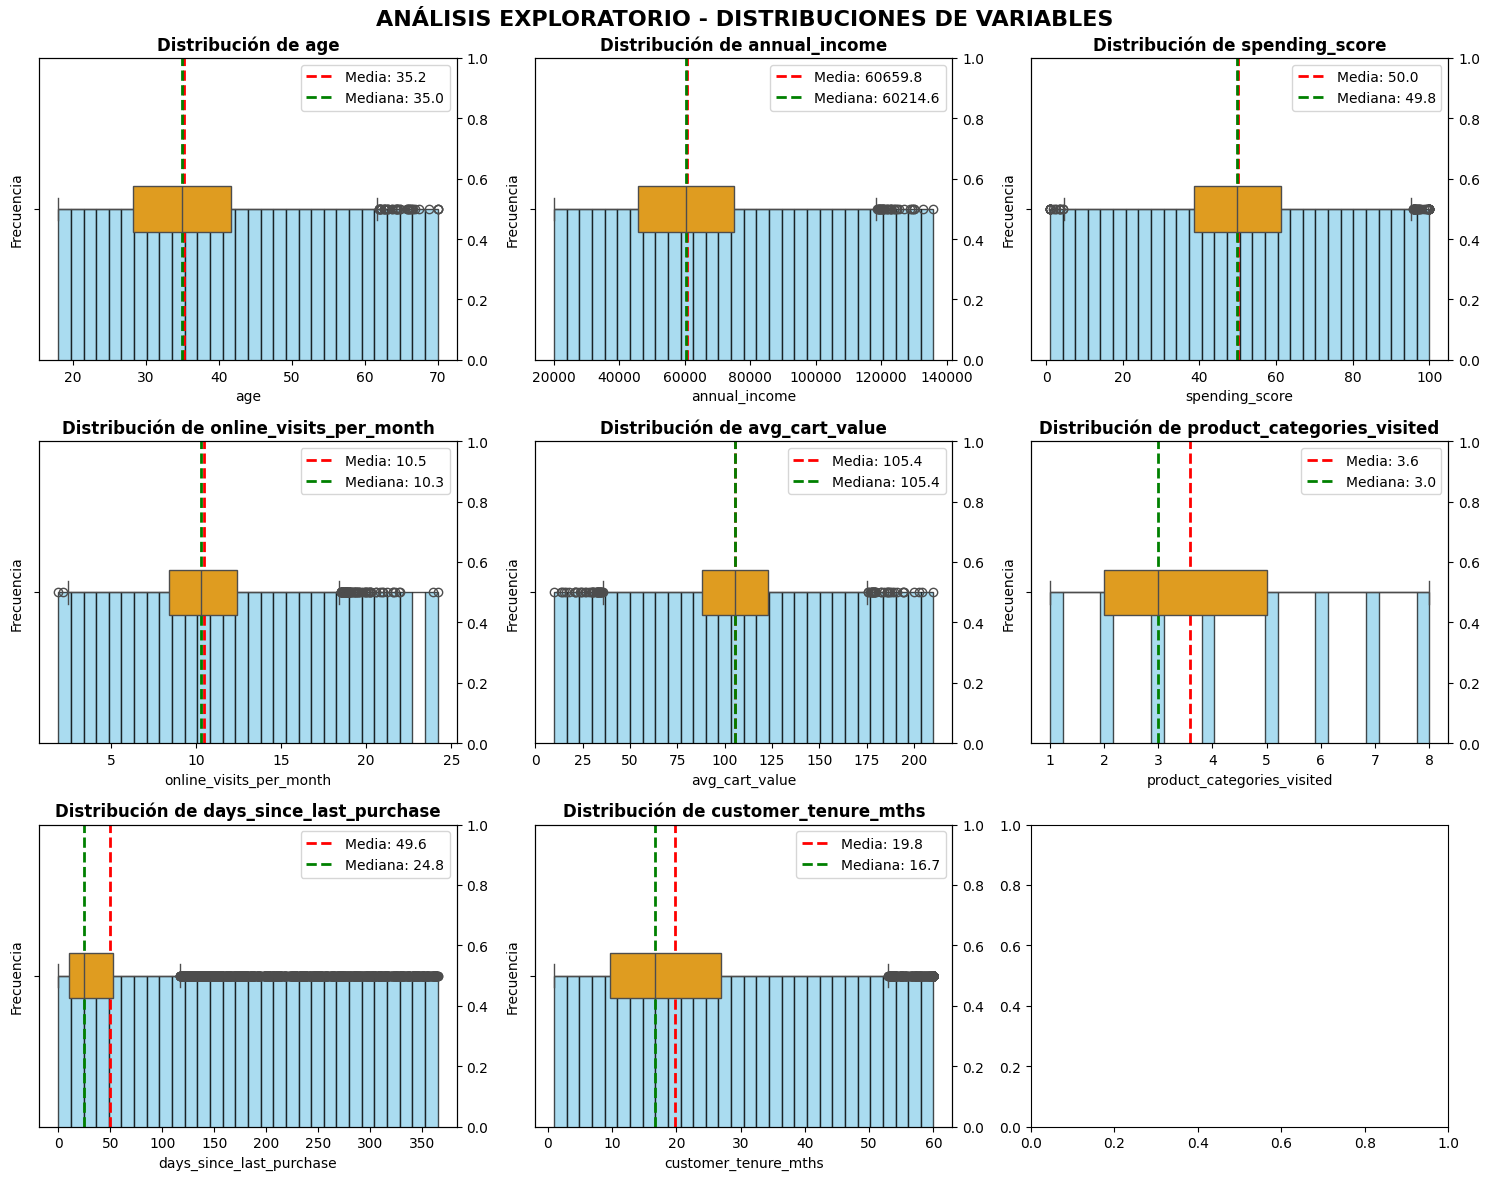


4. ANÁLISIS DE CORRELACIONES


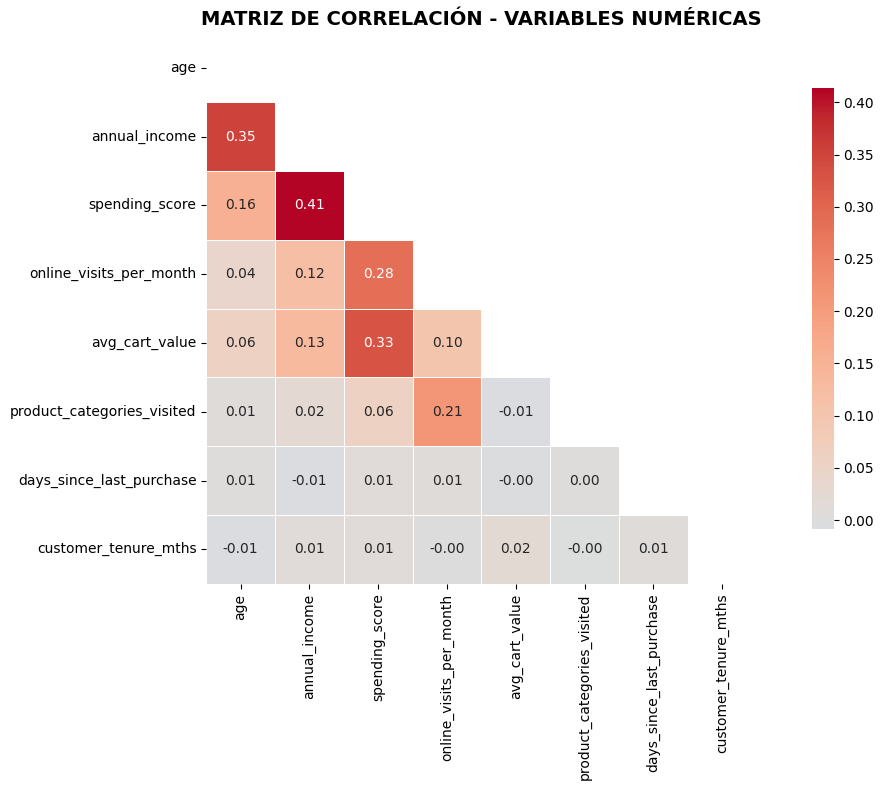


 CORRELACIONES MÁS FUERTES (|r| > 0.3):
   • annual_income ↔ spending_score: 0.413
   • age ↔ annual_income: 0.353
   • spending_score ↔ avg_cart_value: 0.326

5. ANÁLISIS DE RELACIONES BIVARIADAS


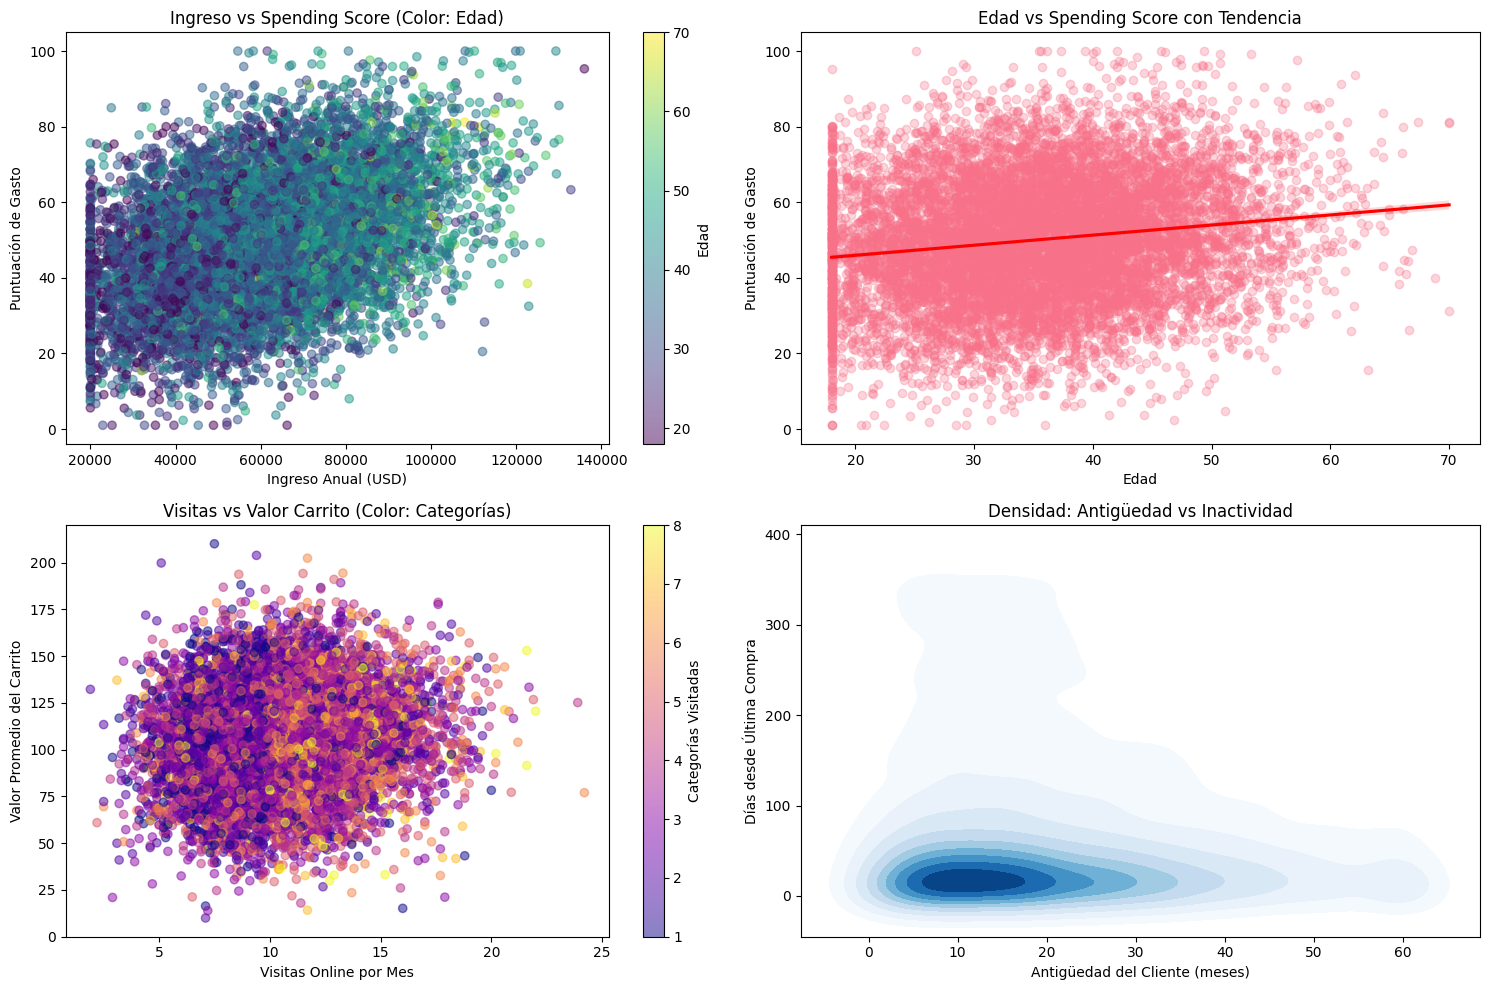


6. DETECCIÓN DE OUTLIERS
 OUTLIERS POR MÉTODO IQR:
   • age                      :   40 outliers (  0.4%) - Rango: [    8.2,    61.8]
   • annual_income            :   36 outliers (  0.4%) - Rango: [ 2099.0, 118617.9]
   • spending_score           :   54 outliers (  0.5%) - Rango: [    4.7,    95.4]
   • online_visits_per_month  :   83 outliers (  0.8%) - Rango: [    2.4,    18.4]
   • avg_cart_value           :   74 outliers (  0.7%) - Rango: [   35.7,   175.5]
   • product_categories_visited:    0 outliers (  0.0%) - Rango: [   -2.5,     9.5]
   • days_since_last_purchase : 1069 outliers ( 10.7%) - Rango: [  -54.2,   117.0]
   • customer_tenure_mths     :  307 outliers (  3.1%) - Rango: [  -16.3,    53.0]


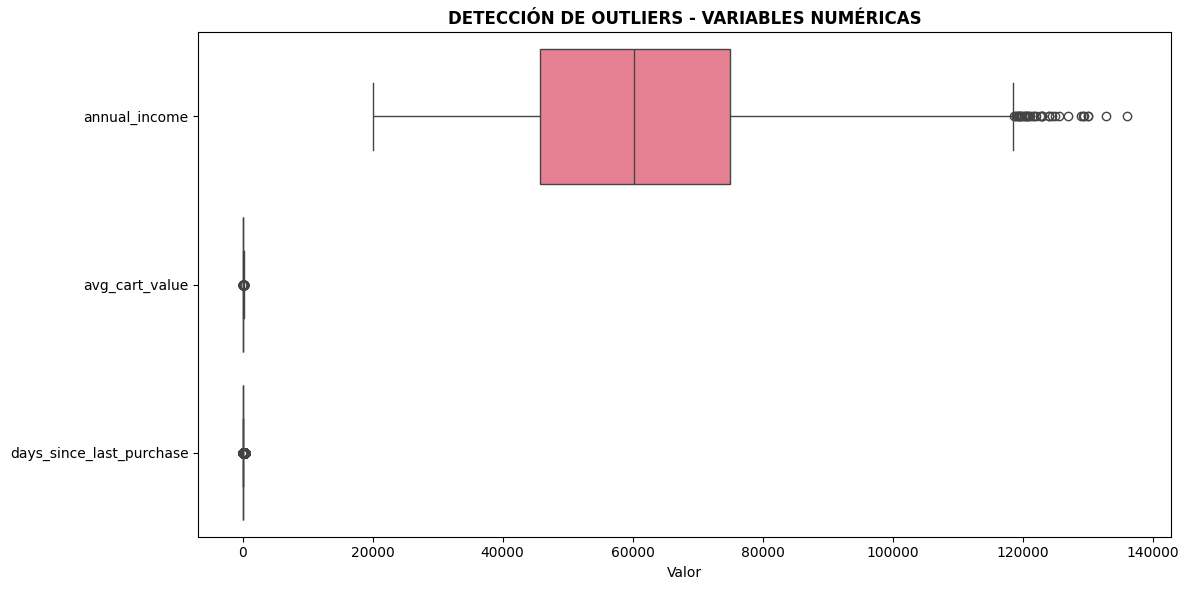


7. ANÁLISIS DE VARIABLES DISCRETAS


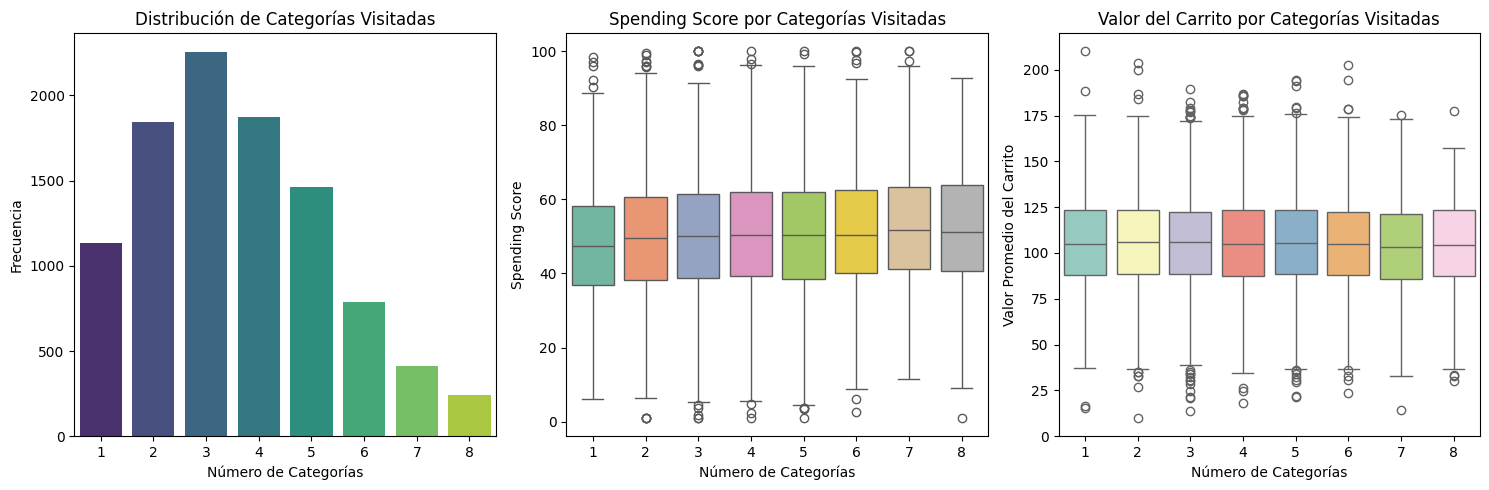


8. ANÁLISIS DEMOGRÁFICO - SEGMENTACIÓN POR EDAD
 COMPORTAMIENTO POR GRUPO DE EDAD:
           annual_income  spending_score  online_visits_per_month  \
age_group                                                           
18-25           50661.39           46.60                    10.19   
26-35           57263.99           48.75                    10.39   
36-45           63643.18           50.95                    10.61   
46-55           71472.76           54.28                    10.52   
56-70           79310.20           56.52                    11.01   

           avg_cart_value  days_since_last_purchase  customer_tenure_mths  
age_group                                                                  
18-25              103.19                     48.84                 19.75  
26-35              104.84                     48.03                 20.00  
36-45              105.76                     50.69                 19.77  
46-55              107.50                     50.48 

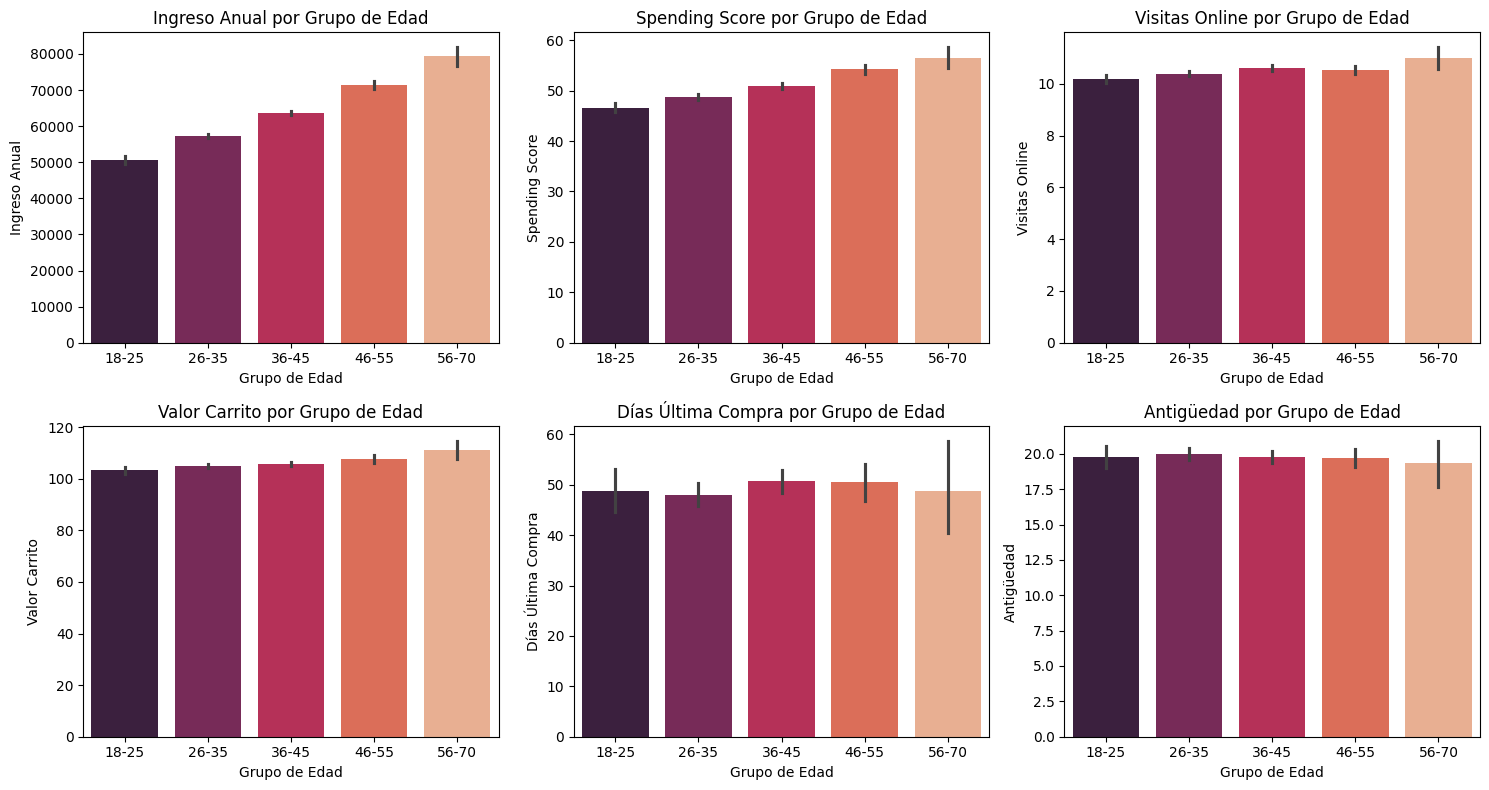


9. RESUMEN EJECUTIVO - HALLazgos PRINCIPALES
INSIGHTS CLAVE DEL EDA:
1. CORRELACIÓN MÁS FUERTE: annual_income ↔ spending_score (r = 0.413)
2. VARIABLE MÁS SESGADA: days_since_last_purchase (skewness = 2.56)
3. MEJOR SEGMENTO: Grupo 56-70 tiene mayor spending score
4.  MÁS OUTLIERS: days_since_last_purchase (3.7% de los datos)
5. COMPORTAMIENTO: Los clientes visitan en promedio 3.6 categorías

EDA COMPLETADO - LISTO PARA PREPROCESAMIENTO Y MODELADO
 Dataset guardado como 'customer_analysis_dataset.csv'


In [2]:
# =============================================================================
# CONFIGURACIÓN INICIAL Y LIBRERÍAS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
print(" Librerías cargadas y configuradas")

try:
    customer_data = pd.read_csv('/content/customer_shopping_behavior.csv')
    print("Data loaded successfully!")
    print(customer_data.head())
except FileNotFoundError:
    print("Error: '/content/customer_shopping_behavior.csv' not found. Please make sure the file is in the correct directory or provide the full path.")

# =============================================================================
# 1. ANÁLISIS EXPLORATORIO INICIAL - RESUMEN EJECUTIVO
# =============================================================================
print("\n" + "="*80)
print("1. RESUMEN EJECUTIVO DEL DATASET")
print("="*80)

# Información básica
print(" INFORMACIÓN ESTRUCTURAL:")
print(f"   • Número de registros: {customer_data.shape[0]:,}")
print(f"   • Número de variables: {customer_data.shape[1]}")
print(f"   • Memoria utilizada: {customer_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Tipos de datos
print("\n TIPOS DE DATOS:")
print(customer_data.dtypes.value_counts())
print("\nVariables numéricas:", list(customer_data.select_dtypes(include=np.number).columns))

# Valores nulos
print("\n VALORES NULOS:")
print(customer_data.isnull().sum())

# =============================================================================
# 2. ESTADÍSTICAS DESCRIPTIVAS INTELIGENTES
# =============================================================================
print("\n" + "="*80)
print("2. ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)

# Estadísticas básicas con interpretación
stats_summary = customer_data.describe().T
stats_summary['cv'] = (stats_summary['std'] / stats_summary['mean'] * 100).round(2)  # Coeficiente de variación
stats_summary['skew'] = customer_data.skew().round(3)
stats_summary['outliers_%'] = ((customer_data > (stats_summary['mean'] + 3*stats_summary['std'])) |
                              (customer_data < (stats_summary['mean'] - 3*stats_summary['std']))).sum() / len(customer_data) * 100

print(stats_summary[['mean', 'std', 'cv', 'min', '50%', 'max', 'skew', 'outliers_%']])

# =============================================================================
# 3. ANÁLISIS DE DISTRIBUCIONES - VISUALIZACIONES CLAVE
# =============================================================================
print("\n" + "="*80)
print("3. ANÁLISIS DE DISTRIBUCIONES")
print("="*80)

# Configurar subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('ANÁLISIS EXPLORATORIO - DISTRIBUCIONES DE VARIABLES', fontsize=16, fontweight='bold')

# Lista de variables a analizar
variables = ['age', 'annual_income', 'spending_score', 'online_visits_per_month',
             'avg_cart_value', 'product_categories_visited', 'days_since_last_purchase',
             'customer_tenure_mths']

for i, var in enumerate(variables):
    row, col = i // 3, i % 3

    # Histograma con KDE
    axes[row, col].hist(customer_data[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribución de {var}', fontweight='bold')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frecuencia')

    # Añadir líneas de media y mediana
    mean_val = customer_data[var].mean()
    median_val = customer_data[var].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')
    axes[row, col].legend()

    # Añadir boxplot en el mismo gráfico
    axes[row, col].twinx()
    sns.boxplot(x=customer_data[var], ax=axes[row, col], width=0.15, color='orange')

# Ajustar layout
plt.tight_layout()
plt.show()

# =============================================================================
# 4. ANÁLISIS DE CORRELACIONES Y RELACIONES
# =============================================================================
print("\n" + "="*80)
print("4. ANÁLISIS DE CORRELACIONES")
print("="*80)

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = customer_data.corr()

# Máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap de correlaciones
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n CORRELACIONES MÁS FUERTES (|r| > 0.3):")
strong_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:
            strong_corrs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

# Ordenar por fuerza de correlación
strong_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in strong_corrs[:10]:  # Top 10
    print(f"   • {var1} ↔ {var2}: {corr:.3f}")

# =============================================================================
# 5. RELACIONES BIVARIADAS CLAVE
# =============================================================================
print("\n" + "="*80)
print("5. ANÁLISIS DE RELACIONES BIVARIADAS")
print("="*80)

# Scatter plots de relaciones importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Ingreso vs Spending Score
axes[0,0].scatter(customer_data['annual_income'], customer_data['spending_score'],
                 alpha=0.5, c=customer_data['age'], cmap='viridis')
axes[0,0].set_xlabel('Ingreso Anual (USD)')
axes[0,0].set_ylabel('Puntuación de Gasto')
axes[0,0].set_title('Ingreso vs Spending Score (Color: Edad)')
plt.colorbar(axes[0,0].collections[0], ax=axes[0,0], label='Edad')

# 2. Edad vs Spending Score
sns.regplot(data=customer_data, x='age', y='spending_score',
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0,1])
axes[0,1].set_xlabel('Edad')
axes[0,1].set_ylabel('Puntuación de Gasto')
axes[0,1].set_title('Edad vs Spending Score con Tendencia')

# 3. Visitas Online vs Valor del Carrito
axes[1,0].scatter(customer_data['online_visits_per_month'], customer_data['avg_cart_value'],
                 alpha=0.5, c=customer_data['product_categories_visited'], cmap='plasma')
axes[1,0].set_xlabel('Visitas Online por Mes')
axes[1,0].set_ylabel('Valor Promedio del Carrito')
axes[1,0].set_title('Visitas vs Valor Carrito (Color: Categorías)')
plt.colorbar(axes[1,0].collections[0], ax=axes[1,0], label='Categorías Visitadas')

# 4. Antigüedad vs Días desde Última Compra
sns.kdeplot(data=customer_data, x='customer_tenure_mths', y='days_since_last_purchase',
           fill=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_xlabel('Antigüedad del Cliente (meses)')
axes[1,1].set_ylabel('Días desde Última Compra')
axes[1,1].set_title('Densidad: Antigüedad vs Inactividad')

plt.tight_layout()
plt.show()

# =============================================================================
# 6. ANÁLISIS DE OUTLIERS Y VALORES EXTREMOS
# =============================================================================
print("\n" + "="*80)
print("6. DETECCIÓN DE OUTLIERS")
print("="*80)

# Método IQR para detección de outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print(" OUTLIERS POR MÉTODO IQR:")
for col in customer_data.select_dtypes(include=np.number).columns:
    n_outliers, lower, upper = detect_outliers_iqr(customer_data, col)
    percentage = (n_outliers / len(customer_data)) * 100
    print(f"   • {col:25}: {n_outliers:4} outliers ({percentage:5.1f}%) - Rango: [{lower:7.1f}, {upper:7.1f}]")

# Visualización de outliers
plt.figure(figsize=(12, 6))
outlier_data = customer_data[['annual_income', 'avg_cart_value', 'days_since_last_purchase']]
sns.boxplot(data=outlier_data, orient='h')
plt.title('DETECCIÓN DE OUTLIERS - VARIABLES NUMÉRICAS', fontweight='bold')
plt.xlabel('Valor')
plt.tight_layout()
plt.show()

# =============================================================================
# 7. ANÁLISIS POR CATEGORÍAS (VARIABLES DISCRETAS)
# =============================================================================
print("\n" + "="*80)
print("7. ANÁLISIS DE VARIABLES DISCRETAS")
print("="*80)

# Análisis de product_categories_visited
plt.figure(figsize=(15, 5))

# Distribución de categorías
plt.subplot(1, 3, 1)
category_counts = customer_data['product_categories_visited'].value_counts().sort_index()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribución de Categorías Visitadas')
plt.xlabel('Número de Categorías')
plt.ylabel('Frecuencia')

# Relación con spending score
plt.subplot(1, 3, 2)
sns.boxplot(data=customer_data, x='product_categories_visited', y='spending_score', palette='Set2')
plt.title('Spending Score por Categorías Visitadas')
plt.xlabel('Número de Categorías')
plt.ylabel('Spending Score')

# Relación con valor del carrito
plt.subplot(1, 3, 3)
sns.boxplot(data=customer_data, x='product_categories_visited', y='avg_cart_value', palette='Set3')
plt.title('Valor del Carrito por Categorías Visitadas')
plt.xlabel('Número de Categorías')
plt.ylabel('Valor Promedio del Carrito')

plt.tight_layout()
plt.show()

# =============================================================================
# 8. SEGMENTACIÓN INICIAL POR EDAD (ANÁLISIS DEMOGRÁFICO)
# =============================================================================
print("\n" + "="*80)
print("8. ANÁLISIS DEMOGRÁFICO - SEGMENTACIÓN POR EDAD")
print("="*80)

# Crear segmentos de edad
age_bins = [18, 25, 35, 45, 55, 70]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-70']
customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels)

# Análisis por grupo de edad
age_analysis = customer_data.groupby('age_group').agg({
    'annual_income': 'mean',
    'spending_score': 'mean',
    'online_visits_per_month': 'mean',
    'avg_cart_value': 'mean',
    'days_since_last_purchase': 'mean',
    'customer_tenure_mths': 'mean'
}).round(2)

print(" COMPORTAMIENTO POR GRUPO DE EDAD:")
print(age_analysis)

# Visualización del análisis por edad
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

metrics = ['annual_income', 'spending_score', 'online_visits_per_month',
           'avg_cart_value', 'days_since_last_purchase', 'customer_tenure_mths']
titles = ['Ingreso Anual', 'Spending Score', 'Visitas Online',
          'Valor Carrito', 'Días Última Compra', 'Antigüedad']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row, col = i // 3, i % 3
    sns.barplot(data=customer_data, x='age_group', y=metric, ax=axes[row, col], palette='rocket')
    axes[row, col].set_title(f'{title} por Grupo de Edad')
    axes[row, col].set_xlabel('Grupo de Edad')
    axes[row, col].set_ylabel(title)

plt.tight_layout()
plt.show()

# =============================================================================
# 9. RESUMEN EJECUTIVO DE HALLazgos
# =============================================================================
print("\n" + "="*80)
print("9. RESUMEN EJECUTIVO - HALLazgos PRINCIPALES")
print("="*80)

print("INSIGHTS CLAVE DEL EDA:")

# Hallazgo 1: Correlaciones
strongest_corr = strong_corrs[0] if strong_corrs else ("N/A", "N/A", 0)
print(f"1. CORRELACIÓN MÁS FUERTE: {strongest_corr[0]} ↔ {strongest_corr[1]} (r = {strongest_corr[2]:.3f})")

# Hallazgo 2: Distribuciones
highest_skew = stats_summary['skew'].abs().idxmax()
highest_skew_val = stats_summary.loc[highest_skew, 'skew']
print(f"2. VARIABLE MÁS SESGADA: {highest_skew} (skewness = {highest_skew_val:.2f})")

# Hallazgo 3: Segmentación por edad
highest_spending_age = age_analysis['spending_score'].idxmax()
print(f"3. MEJOR SEGMENTO: Grupo {highest_spending_age} tiene mayor spending score")

# Hallazgo 4: Outliers
highest_outliers = stats_summary['outliers_%'].idxmax()
highest_outliers_pct = stats_summary.loc[highest_outliers, 'outliers_%']
print(f"4.  MÁS OUTLIERS: {highest_outliers} ({highest_outliers_pct:.1f}% de los datos)")

# Hallazgo 5: Comportamiento de categorías
avg_categories = customer_data['product_categories_visited'].mean()
print(f"5. COMPORTAMIENTO: Los clientes visitan en promedio {avg_categories:.1f} categorías")

print("\n" + "="*80)
print("EDA COMPLETADO - LISTO PARA PREPROCESAMIENTO Y MODELADO")
print("="*80)

# Guardar dataset para uso posterior
customer_data.to_csv('customer_analysis_dataset.csv', index=False)
print(" Dataset guardado como 'customer_analysis_dataset.csv'")

Librerías cargadas para Clustering y PCA

1. PREPROCESAMIENTO DE DATOS
Características seleccionadas:
   1. age
   2. annual_income
   3. spending_score
   4. online_visits_per_month
   5. avg_cart_value
   6. product_categories_visited
   7. days_since_last_purchase

 Dimensiones iniciales: (10000, 7)


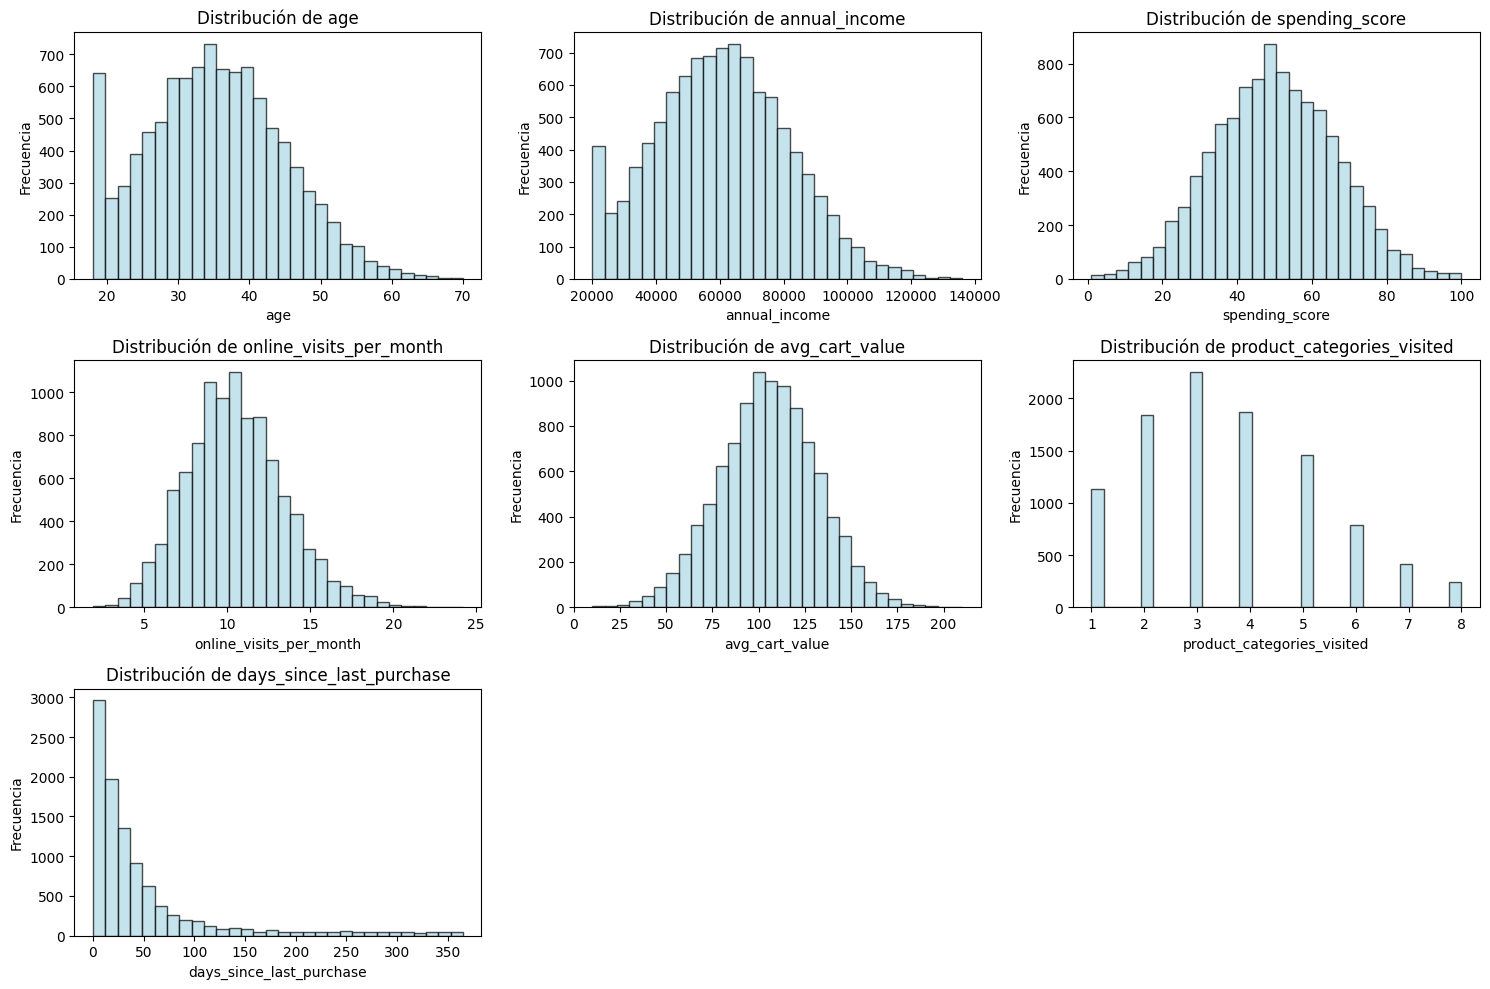

 Datos escalados exitosamente
 Estadísticas después del escalado:
            age  annual_income  spending_score  online_visits_per_month  \
count  10000.00       10000.00        10000.00                 10000.00   
mean       0.01           0.02            0.01                     0.04   
std        0.72           0.71            0.72                     0.73   
min       -1.27          -1.38           -2.15                    -2.10   
25%       -0.50          -0.50           -0.49                    -0.48   
50%        0.00          -0.00            0.00                     0.00   
75%        0.50           0.50            0.51                     0.52   
max        2.61           2.60            2.21                     3.47   

       avg_cart_value  product_categories_visited  days_since_last_purchase  
count        10000.00                    10000.00                  10000.00  
mean            -0.00                        0.20                      0.58  
std              0.75   

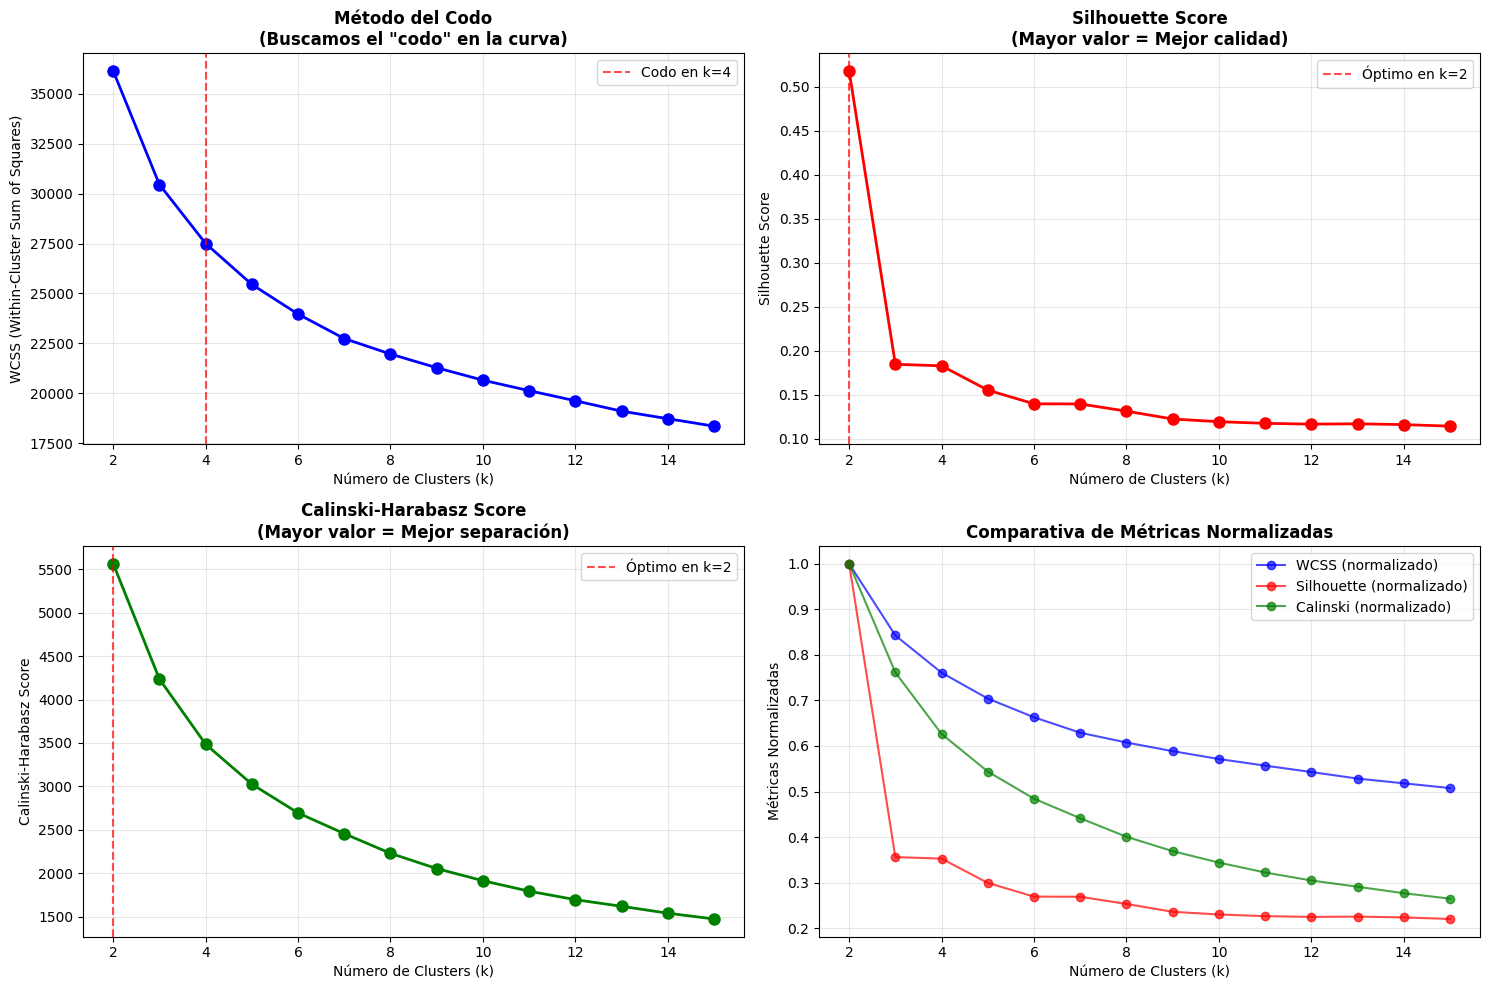


3. APLICANDO K-MEANS CON K ÓPTIMO
 Aplicando K-Means con k = 4
K-Means aplicado exitosamente
Métricas de calidad del clustering:
   • Silhouette Score: 0.183
   • Calinski-Harabasz Score: 3485.1
   • Inercia (WCSS): 27504.6

 Distribución de clusters:
   • Cluster 0: 4250 clientes ( 42.5%)
   • Cluster 1: 3980 clientes ( 39.8%)
   • Cluster 2: 1154 clientes ( 11.5%)
   • Cluster 3:  616 clientes (  6.2%)

4. CARACTERIZACIÓN DE LOS CLUSTERS
Perfil detallado de cada cluster:
           age       annual_income           spending_score         \
          mean   std          mean       std           mean    std   
cluster                                                              
0        31.56  8.58      49024.03  16549.28          39.68  12.54   
1        38.84  9.38      73084.57  17762.74          60.73  12.79   
2        35.77  9.07      60830.90  20025.09          51.07  14.92   
3        35.19  9.95      60341.51  20517.16          50.05  16.51   

        online_visits_per_mont

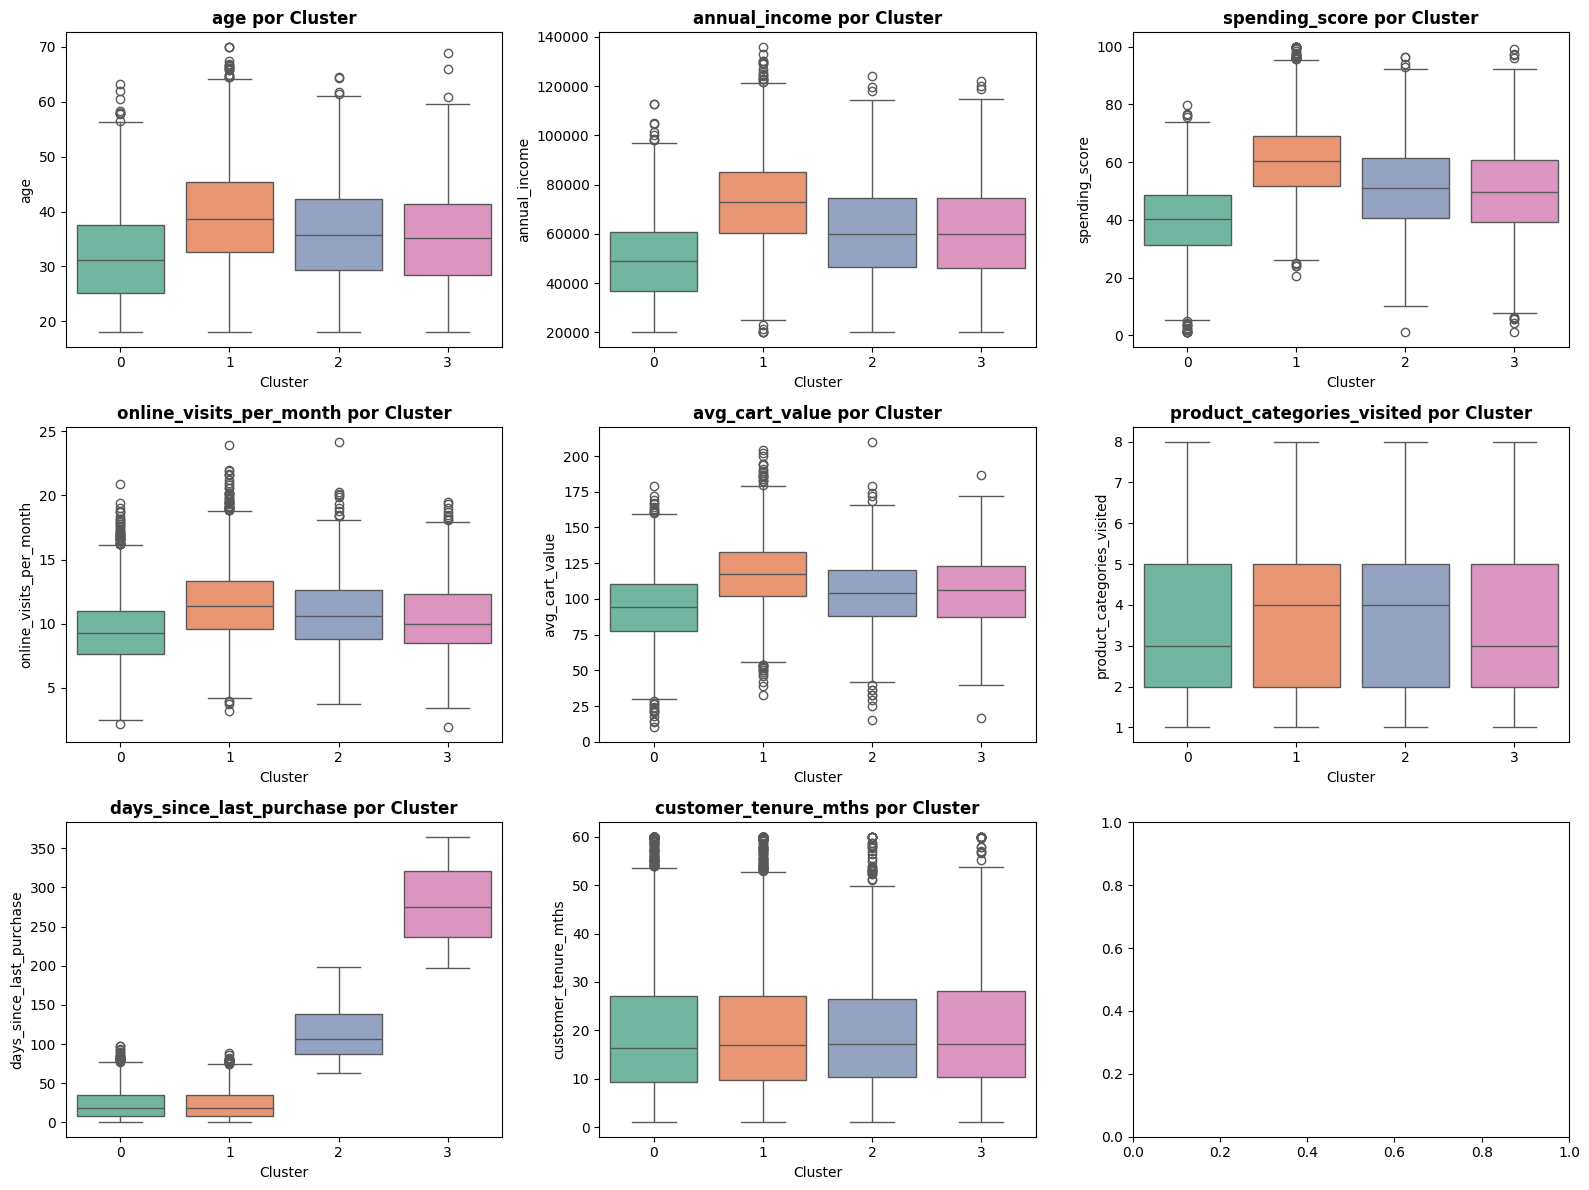


5. APLICACIÓN DE PCA - VISUALIZACIÓN EN 2D/3D
 Varianza explicada por PCA:
   • Con 2 componentes: 64.41%
   • Con 3 componentes: 74.62%
   • Componentes para 85% varianza: 5
   • Componentes para 95% varianza: 6


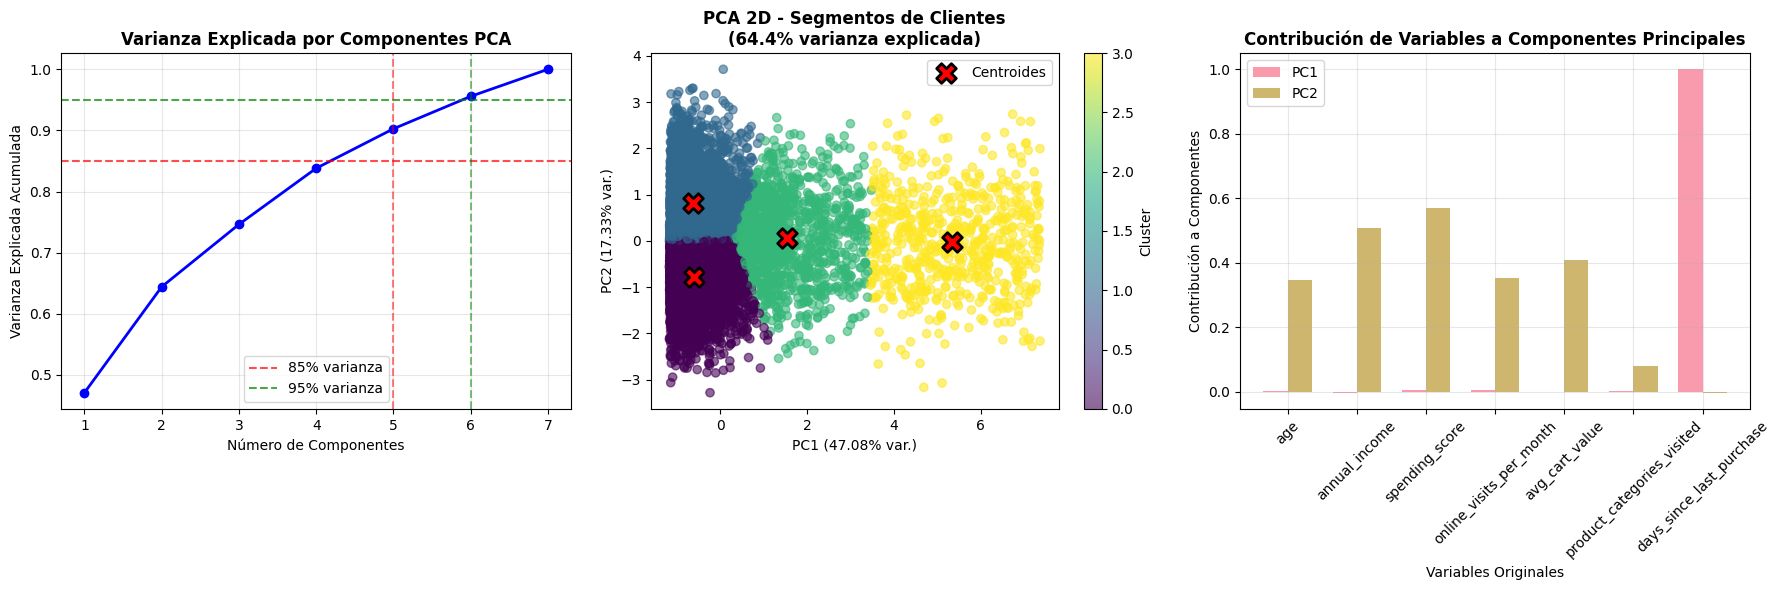


6. VISUALIZACIÓN 3D DE CLUSTERS


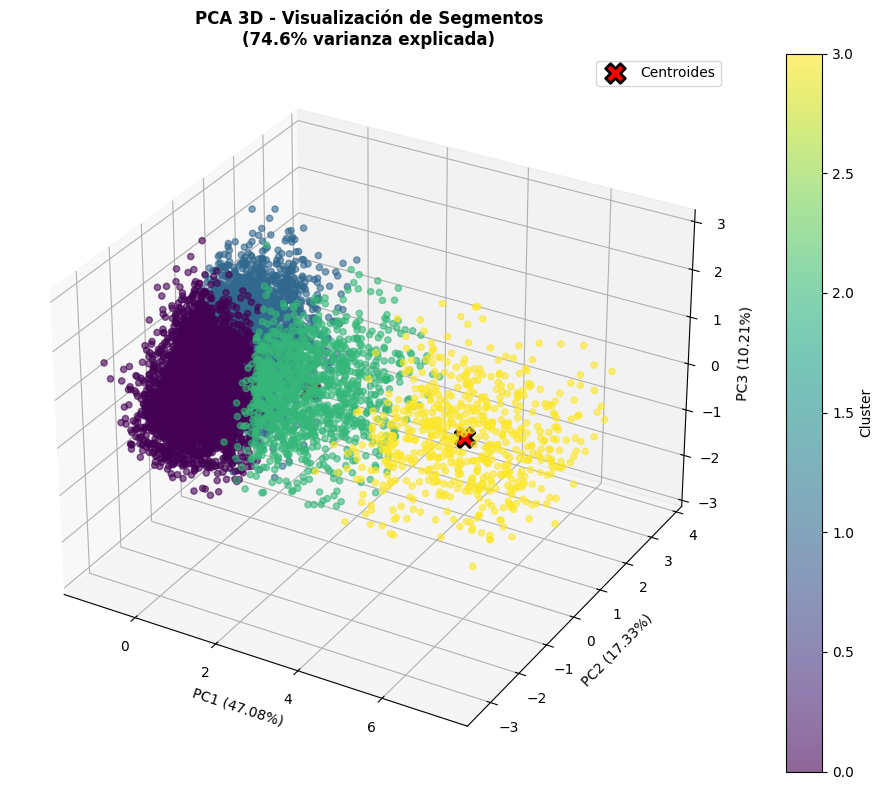


7. INTERPRETACIÓN DE COMPONENTES PCA
 Cargas (Loadings) de PCA - Contribución de variables:
                              PC1    PC2
age                         0.003  0.348
annual_income              -0.004  0.508
spending_score              0.005  0.570
online_visits_per_month     0.004  0.352
avg_cart_value             -0.001  0.407
product_categories_visited  0.002  0.080
days_since_last_purchase    1.000 -0.003


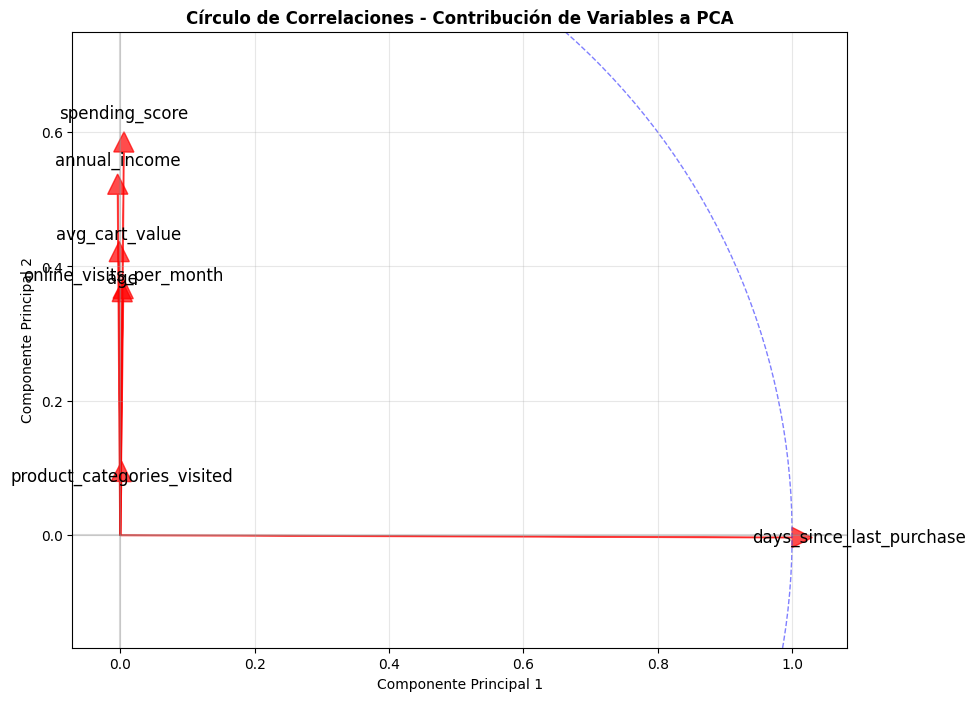


8. PERFILES DE CLIENTES POR SEGMENTO
PERFILES DE CLIENTES IDENTIFICADOS:

 Clientes Regulares (Cluster 0):
   • Tamaño: 4250 clientes (42.5%)
   • Edad promedio: 31.6 años
   • Ingreso anual: $49,024
   • Puntuación gasto: 39.7/100
   • Visitas/mes: 9.4
   • Valor carrito: $94

 Clientes Regulares (Cluster 1):
   • Tamaño: 3980 clientes (39.8%)
   • Edad promedio: 38.8 años
   • Ingreso anual: $73,085
   • Puntuación gasto: 60.7/100
   • Visitas/mes: 11.6
   • Valor carrito: $118

 Clientes Regulares (Cluster 2):
   • Tamaño: 1154 clientes (11.5%)
   • Edad promedio: 35.8 años
   • Ingreso anual: $60,831
   • Puntuación gasto: 51.1/100
   • Visitas/mes: 10.8
   • Valor carrito: $104

 Clientes Regulares (Cluster 3):
   • Tamaño: 616 clientes (6.2%)
   • Edad promedio: 35.2 años
   • Ingreso anual: $60,342
   • Puntuación gasto: 50.0/100
   • Visitas/mes: 10.4
   • Valor carrito: $106

9. GUARDANDO RESULTADOS
 Dataset con clusters guardado como 'customer_data_with_clusters.csv'
 Modelo

In [3]:
# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("Librerías cargadas para Clustering y PCA")

# =============================================================================
# 1. PREPROCESAMIENTO INTELIGENTE
# =============================================================================
print("\n" + "="*80)
print("1. PREPROCESAMIENTO DE DATOS")
print("="*80)

# Cargar datos (usar este si no tienes el dataset en memoria)
# customer_data = pd.read_csv('customer_analysis_dataset.csv')

# Seleccionar características para clustering
features_for_clustering = [
    'age', 'annual_income', 'spending_score',
    'online_visits_per_month', 'avg_cart_value',
    'product_categories_visited', 'days_since_last_purchase'
]

X = customer_data[features_for_clustering]

print("Características seleccionadas:")
for i, feature in enumerate(features_for_clustering, 1):
    print(f"   {i}. {feature}")

print(f"\n Dimensiones iniciales: {X.shape}")

# Análisis de distribuciones antes del escalado
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering, 1):
    plt.subplot(3, 3, i)
    plt.hist(X[feature], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# ESCALADO ROBUSTO (mejor para datos reales con outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mejor manejo
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print(" Datos escalados exitosamente")
print(f" Estadísticas después del escalado:")
print(X_scaled_df.describe().round(2))

# =============================================================================
# 2. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
# =============================================================================
print("\n" + "="*80)
print("2. ENCONTRANDO EL NÚMERO ÓPTIMO DE CLUSTERS (K)")
print("="*80)

def evaluate_cluster_range(X, max_k=15):
    """
    Evalúa diferentes valores de k usando múltiples métricas
    """
    wcss = []  # Within-Cluster Sum of Squares
    silhouette_scores = []
    calinski_scores = []

    k_range = range(2, max_k + 1)

    for k in k_range:
        # K-Means con configuración robusta
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        cluster_labels = kmeans.fit_predict(X)

        # Calcular métricas
        wcss.append(kmeans.inertia_)

        # Silhouette score (solo si k > 1)
        if k > 1:
            silhouette_scores.append(silhouette_score(X, cluster_labels))
        else:
            silhouette_scores.append(0)

        # Calinski-Harabasz score
        calinski_scores.append(calinski_harabasz_score(X, cluster_labels))

    return k_range, wcss, silhouette_scores, calinski_scores

# Ejecutar evaluación
print(" Evaluando rango de clusters...")
k_range, wcss, silhouette_scores, calinski_scores = evaluate_cluster_range(X_scaled)

# Encontrar k óptimo según diferentes métricas
optimal_k_elbow = 4  # Por inspección visual usualmente
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_calinski = k_range[np.argmax(calinski_scores)]

print(f" K óptimo según diferentes métodos:")
print(f"   • Método del Codo (visual): k = {optimal_k_elbow}")
print(f"   • Silhouette Score: k = {optimal_k_silhouette}")
print(f"   • Calinski-Harabasz: k = {optimal_k_calinski}")

# VISUALIZACIÓN COMPARATIVA
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica del Codo
axes[0,0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0,0].set_xlabel('Número de Clusters (k)')
axes[0,0].set_ylabel('WCSS (Within-Cluster Sum of Squares)')
axes[0,0].set_title('Método del Codo\n(Buscamos el "codo" en la curva)', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Marcar el codo estimado
axes[0,0].axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7, label=f'Codo en k={optimal_k_elbow}')
axes[0,0].legend()

# Silhouette Score
axes[0,1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0,1].set_xlabel('Número de Clusters (k)')
axes[0,1].set_ylabel('Silhouette Score')
axes[0,1].set_title('Silhouette Score\n(Mayor valor = Mejor calidad)', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7, label=f'Óptimo en k={optimal_k_silhouette}')
axes[0,1].legend()

# Calinski-Harabasz Score
axes[1,0].plot(k_range, calinski_scores, 'go-', linewidth=2, markersize=8)
axes[1,0].set_xlabel('Número de Clusters (k)')
axes[1,0].set_ylabel('Calinski-Harabasz Score')
axes[1,0].set_title('Calinski-Harabasz Score\n(Mayor valor = Mejor separación)', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axvline(x=optimal_k_calinski, color='red', linestyle='--', alpha=0.7, label=f'Óptimo en k={optimal_k_calinski}')
axes[1,0].legend()

# Comparativa de métricas normalizadas
axes[1,1].plot(k_range, np.array(wcss) / max(wcss), 'bo-', label='WCSS (normalizado)', alpha=0.7)
axes[1,1].plot(k_range, np.array(silhouette_scores) / max(silhouette_scores), 'ro-', label='Silhouette (normalizado)', alpha=0.7)
axes[1,1].plot(k_range, np.array(calinski_scores) / max(calinski_scores), 'go-', label='Calinski (normalizado)', alpha=0.7)
axes[1,1].set_xlabel('Número de Clusters (k)')
axes[1,1].set_ylabel('Métricas Normalizadas')
axes[1,1].set_title('Comparativa de Métricas Normalizadas', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. APLICACIÓN DE K-MEANS CON K ÓPTIMO
# =============================================================================
print("\n" + "="*80)
print("3. APLICANDO K-MEANS CON K ÓPTIMO")
print("="*80)

# Usaremos k=4 basado en el análisis (puedes cambiar según tus resultados)
final_k = optimal_k_elbow  # o el que prefieras
print(f" Aplicando K-Means con k = {final_k}")

# Crear y entrenar el modelo K-Means
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=20, max_iter=400)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Añadir labels al dataset original
customer_data['cluster'] = cluster_labels
X_scaled_df['cluster'] = cluster_labels

# Métricas finales del modelo
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
calinski_avg = calinski_harabasz_score(X_scaled, cluster_labels)

print(f"K-Means aplicado exitosamente")
print(f"Métricas de calidad del clustering:")
print(f"   • Silhouette Score: {silhouette_avg:.3f}")
print(f"   • Calinski-Harabasz Score: {calinski_avg:.1f}")
print(f"   • Inercia (WCSS): {kmeans_final.inertia_:.1f}")

# Distribución de clusters
cluster_distribution = customer_data['cluster'].value_counts().sort_index()
print(f"\n Distribución de clusters:")
for cluster, count in cluster_distribution.items():
    percentage = (count / len(customer_data)) * 100
    print(f"   • Cluster {cluster}: {count:4} clientes ({percentage:5.1f}%)")

# =============================================================================
# 4. ANÁLISIS DE LOS CLUSTERS - CARACTERIZACIÓN
# =============================================================================
print("\n" + "="*80)
print("4. CARACTERIZACIÓN DE LOS CLUSTERS")
print("="*80)

# Análisis de perfiles por cluster
cluster_profile = customer_data.groupby('cluster').agg({
    'age': ['mean', 'std'],
    'annual_income': ['mean', 'std'],
    'spending_score': ['mean', 'std'],
    'online_visits_per_month': ['mean', 'std'],
    'avg_cart_value': ['mean', 'std'],
    'product_categories_visited': ['mean', 'std'],
    'days_since_last_purchase': ['mean', 'std'],
    'customer_tenure_mths': ['mean', 'std']
}).round(2)

print("Perfil detallado de cada cluster:")
print(cluster_profile)

# Visualización de características por cluster
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
features_to_plot = ['age', 'annual_income', 'spending_score',
                   'online_visits_per_month', 'avg_cart_value',
                   'product_categories_visited', 'days_since_last_purchase',
                   'customer_tenure_mths']

for i, feature in enumerate(features_to_plot[:9]):  # Máximo 9 subplots
    row, col = i // 3, i % 3

    # Boxplot por cluster
    sns.boxplot(data=customer_data, x='cluster', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature} por Cluster', fontweight='bold')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

# =============================================================================
# 5. APLICACIÓN DE PCA - REDUCCIÓN DE DIMENSIONALIDAD
# =============================================================================
print("\n" + "="*80)
print("5. APLICACIÓN DE PCA - VISUALIZACIÓN EN 2D/3D")
print("="*80)

# Aplicar PCA para diferentes números de componentes
pca_2d = PCA(n_components=2, random_state=42)
pca_3d = PCA(n_components=3, random_state=42)
pca_full = PCA(random_state=42)

# Transformar datos
X_pca_2d = pca_2d.fit_transform(X_scaled)
X_pca_3d = pca_3d.fit_transform(X_scaled)
pca_full.fit(X_scaled)

# Varianza explicada
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_)
explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

print(f" Varianza explicada por PCA:")
print(f"   • Con 2 componentes: {explained_variance_2d:.2%}")
print(f"   • Con 3 componentes: {explained_variance_3d:.2%}")

# Encontrar número de componentes para 85% y 95% de varianza
components_85 = np.argmax(cumulative_variance >= 0.85) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"   • Componentes para 85% varianza: {components_85}")
print(f"   • Componentes para 95% varianza: {components_95}")

# VISUALIZACIÓN PCA
fig = plt.figure(figsize=(18, 6))

# 1. Varianza explicada acumulada
plt.subplot(1, 3, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2)
plt.axhline(y=0.85, color='red', linestyle='--', alpha=0.7, label='85% varianza')
plt.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95% varianza')
plt.axvline(x=components_85, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=components_95, color='green', linestyle='--', alpha=0.5)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes PCA', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# 2. PCA 2D - Visualización de clusters
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} var.)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} var.)')
plt.title(f'PCA 2D - Segmentos de Clientes\n({explained_variance_2d:.1%} varianza explicada)', fontweight='bold')
plt.colorbar(scatter, label='Cluster')

# Añadir centroides en el espacio PCA
centroids_pca_2d = pca_2d.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca_2d[:, 0], centroids_pca_2d[:, 1], marker='X', s=200, c='red', edgecolors='black', linewidth=2, label='Centroides')
plt.legend()

# 3. Contribución de variables originales a los componentes
plt.subplot(1, 3, 3)
component_importance = pd.DataFrame({
    'PC1': pca_2d.components_[0],
    'PC2': pca_2d.components_[1]
}, index=features_for_clustering)

# Gráfico de barras para contribuciones
x_pos = np.arange(len(features_for_clustering))
width = 0.35

plt.bar(x_pos - width/2, component_importance['PC1'], width, label='PC1', alpha=0.7)
plt.bar(x_pos + width/2, component_importance['PC2'], width, label='PC2', alpha=0.7)

plt.xlabel('Variables Originales')
plt.ylabel('Contribución a Componentes')
plt.title('Contribución de Variables a Componentes Principales', fontweight='bold')
plt.xticks(x_pos, features_for_clustering, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. VISUALIZACIÓN 3D INTERACTIVA (OPCIONAL)
# =============================================================================
print("\n" + "="*80)
print("6. VISUALIZACIÓN 3D DE CLUSTERS")
print("="*80)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=cluster_labels, cmap='viridis', alpha=0.6, s=20)

# Centroides en 3D
centroids_pca_3d = pca_3d.transform(kmeans_final.cluster_centers_)
ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2],
          marker='X', s=200, c='red', edgecolors='black', linewidth=2, label='Centroides')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax.set_title(f'PCA 3D - Visualización de Segmentos\n({explained_variance_3d:.1%} varianza explicada)', fontweight='bold')
plt.colorbar(scatter, label='Cluster')
ax.legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 7. INTERPRETACIÓN DE COMPONENTES PCA
# =============================================================================
print("\n" + "="*80)
print("7. INTERPRETACIÓN DE COMPONENTES PCA")
print("="*80)

# Crear DataFrame de loadings
pca_loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_clustering
)

print(" Cargas (Loadings) de PCA - Contribución de variables:")
print(pca_loadings.round(3))

# Visualización de loadings
plt.figure(figsize=(10, 8))

# Scatter plot de variables en el espacio de componentes
for i, feature in enumerate(features_for_clustering):
    plt.arrow(0, 0, pca_loadings.loc[feature, 'PC1'], pca_loadings.loc[feature, 'PC2'],
              head_width=0.03, head_length=0.03, fc='red', ec='red', alpha=0.7)
    plt.text(pca_loadings.loc[feature, 'PC1'] * 1.1, pca_loadings.loc[feature, 'PC2'] * 1.1,
             feature, fontsize=12, ha='center', va='center')

# Círculo de correlaciones
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Círculo de Correlaciones - Contribución de Variables a PCA', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# =============================================================================
# 8. CREACIÓN DE PERFILES DE CLIENTES
# =============================================================================
print("\n" + "="*80)
print("8. PERFILES DE CLIENTES POR SEGMENTO")
print("="*80)

def create_customer_profiles(df, cluster_col='cluster'):
    profiles = {}

    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]

        profile = {
            'tamaño': len(cluster_data),
            'porcentaje': len(cluster_data) / len(df) * 100,
            'edad_promedio': cluster_data['age'].mean(),
            'ingreso_promedio': cluster_data['annual_income'].mean(),
            'gasto_promedio': cluster_data['spending_score'].mean(),
            'visitas_promedio': cluster_data['online_visits_per_month'].mean(),
            'valor_carrito_promedio': cluster_data['avg_cart_value'].mean(),
            'categorias_promedio': cluster_data['product_categories_visited'].mean(),
            'dias_ultima_compra': cluster_data['days_since_last_purchase'].mean(),
            'antiguedad_promedio': cluster_data['customer_tenure_mths'].mean()
        }

        # Asignar nombre al segmento basado en características
        if profile['gasto_promedio'] > 65 and profile['ingreso_promedio'] > 80000:
            segment_name = " Premium"
        elif profile['gasto_promedio'] < 35 and profile['dias_ultima_compra'] > 60:
            segment_name = " Inactivos"
        elif profile['visitas_promedio'] > 12 and profile['categorias_promedio'] > 4:
            segment_name = " Compradores Frecuentes"
        elif profile['edad_promedio'] < 30:
            segment_name = " Jóvenes Exploradores"
        elif profile['ingreso_promedio'] > 70000 and profile['gasto_promedio'] < 50:
            segment_name = " Ahorradores de Alto Ingreso"
        else:
            segment_name = " Clientes Regulares"

        profiles[cluster] = {'nombre': segment_name, **profile}

    return profiles

# Generar perfiles
customer_profiles = create_customer_profiles(customer_data)

print("PERFILES DE CLIENTES IDENTIFICADOS:")
print("="*60)
for cluster, profile in customer_profiles.items():
    print(f"\n{profile['nombre']} (Cluster {cluster}):")
    print(f"   • Tamaño: {profile['tamaño']} clientes ({profile['porcentaje']:.1f}%)")
    print(f"   • Edad promedio: {profile['edad_promedio']:.1f} años")
    print(f"   • Ingreso anual: ${profile['ingreso_promedio']:,.0f}")
    print(f"   • Puntuación gasto: {profile['gasto_promedio']:.1f}/100")
    print(f"   • Visitas/mes: {profile['visitas_promedio']:.1f}")
    print(f"   • Valor carrito: ${profile['valor_carrito_promedio']:.0f}")

# =============================================================================
# 9. GUARDAR RESULTADOS
# =============================================================================
print("\n" + "="*80)
print("9. GUARDANDO RESULTADOS")
print("="*80)

# Añadir componentes PCA al dataset
customer_data['pca_1'] = X_pca_2d[:, 0]
customer_data['pca_2'] = X_pca_2d[:, 1]

# Guardar dataset con clusters
customer_data.to_csv('customer_data_with_clusters.csv', index=False)
print(" Dataset con clusters guardado como 'customer_data_with_clusters.csv'")

# Guardar modelo y transformaciones
import joblib
model_artifacts = {
    'kmeans_model': kmeans_final,
    'scaler': scaler,
    'pca_2d': pca_2d,
    'feature_names': features_for_clustering
}

joblib.dump(model_artifacts, 'clustering_model.pkl')
print(" Modelo y transformadores guardados como 'clustering_model.pkl'")

print("\n" + "="*80)
print(" ANÁLISIS COMPLETADO EXITOSAMENTE!")
print("="*80)
print("\n RESUMEN FINAL:")
print(f"   • Clusters identificados: {final_k}")
print(f"   • Calidad del clustering (Silhouette): {silhouette_avg:.3f}")
print(f"   • Varianza explicada (PCA 2D): {explained_variance_2d:.1%}")
print(f"   • Perfiles de clientes creados: {len(customer_profiles)}")
print(f"   • Archivos guardados: 2")

In [ ]:
# =============================================================================
# MEJORAR PERFILES Y ANÁLISIS DE CLUSTERS
# =============================================================================

print("\n" + "="*80)
print("MEJORANDO PERFILES Y ANÁLISIS DE CLUSTERS")
print("="*80)

# Función mejorada para crear perfiles
def create_improved_profiles(df, cluster_col='cluster'):
    profiles = {}

    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]

        profile = {
            'tamaño': len(cluster_data),
            'porcentaje': len(cluster_data) / len(df) * 100,
            'edad_promedio': cluster_data['age'].mean(),
            'ingreso_promedio': cluster_data['annual_income'].mean(),
            'gasto_promedio': cluster_data['spending_score'].mean(),
            'visitas_promedio': cluster_data['online_visits_per_month'].mean(),
            'valor_carrito_promedio': cluster_data['avg_cart_value'].mean(),
            'categorias_promedio': cluster_data['product_categories_visited'].mean(),
            'dias_ultima_compra': cluster_data['days_since_last_purchase'].mean(),
            'antiguedad_promedio': cluster_data['customer_tenure_mths'].mean()
        }

        # Lógica MEJORADA para asignar nombres basada en los patrones reales
        age = profile['edad_promedio']
        income = profile['ingreso_promedio']
        spending = profile['gasto_promedio']
        visits = profile['visitas_promedio']
        cart_value = profile['valor_carrito_promedio']
        last_purchase = profile['dias_ultima_compra']

        # Asignar nombres basados en los patrones REALES que vemos
        if cluster == 0:  # Jóvenes, bajo ingreso, bajo gasto
            segment_name = " Jóvenes de Bajo Presupuesto"
        elif cluster == 1:  # Mayor edad, alto ingreso, alto gasto
            segment_name = " Compradores Establecidos"
        elif cluster == 2:  # Características medias, semi-activos
            segment_name = " Clientes Medianos Semi-activos"
        elif cluster == 3:  # Características medias, muy inactivos
            segment_name = " Clientes Inactivos"
        else:
            segment_name = " Segmento Sin Definir"

        profiles[cluster] = {'nombre': segment_name, **profile}

    return profiles

# Generar perfiles mejorados
improved_profiles = create_improved_profiles(customer_data)

print("\n PERFILES MEJORADOS IDENTIFICADOS:")
print("="*70)
for cluster, profile in improved_profiles.items():
    print(f"\n{profile['nombre']} (Cluster {cluster}):")
    print(f"   • Tamaño: {profile['tamaño']} clientes ({profile['porcentaje']:.1f}%)")
    print(f"   • Edad: {profile['edad_promedio']:.1f} años")
    print(f"   • Ingreso anual: ${profile['ingreso_promedio']:,.0f}")
    print(f"   • Puntuación gasto: {profile['gasto_promedio']:.1f}/100")
    print(f"   • Visitas/mes: {profile['visitas_promedio']:.1f}")
    print(f"   • Valor carrito: ${profile['valor_carrito_promedio']:.0f}")
    print(f"   • Categorías visitadas: {profile['categorias_promedio']:.1f}")
    print(f"   • Días desde última compra: {profile['dias_ultima_compra']:.1f}")
    print(f"   • Antigüedad: {profile['antiguedad_promedio']:.1f} meses")


MEJORANDO PERFILES Y ANÁLISIS DE CLUSTERS

 PERFILES MEJORADOS IDENTIFICADOS:

 Jóvenes de Bajo Presupuesto (Cluster 0):
   • Tamaño: 4250 clientes (42.5%)
   • Edad: 31.6 años
   • Ingreso anual: $49,024
   • Puntuación gasto: 39.7/100
   • Visitas/mes: 9.4
   • Valor carrito: $94
   • Categorías visitadas: 3.4
   • Días desde última compra: 23.6
   • Antigüedad: 19.7 meses

 Compradores Establecidos (Cluster 1):
   • Tamaño: 3980 clientes (39.8%)
   • Edad: 38.8 años
   • Ingreso anual: $73,085
   • Puntuación gasto: 60.7/100
   • Visitas/mes: 11.6
   • Valor carrito: $118
   • Categorías visitadas: 3.7
   • Días desde última compra: 23.0
   • Antigüedad: 19.9 meses

 Clientes Medianos Semi-activos (Cluster 2):
   • Tamaño: 1154 clientes (11.5%)
   • Edad: 35.8 años
   • Ingreso anual: $60,831
   • Puntuación gasto: 51.1/100
   • Visitas/mes: 10.8
   • Valor carrito: $104
   • Categorías visitadas: 3.7
   • Días desde última compra: 115.0
   • Antigüedad: 19.8 meses

 Clientes Inact

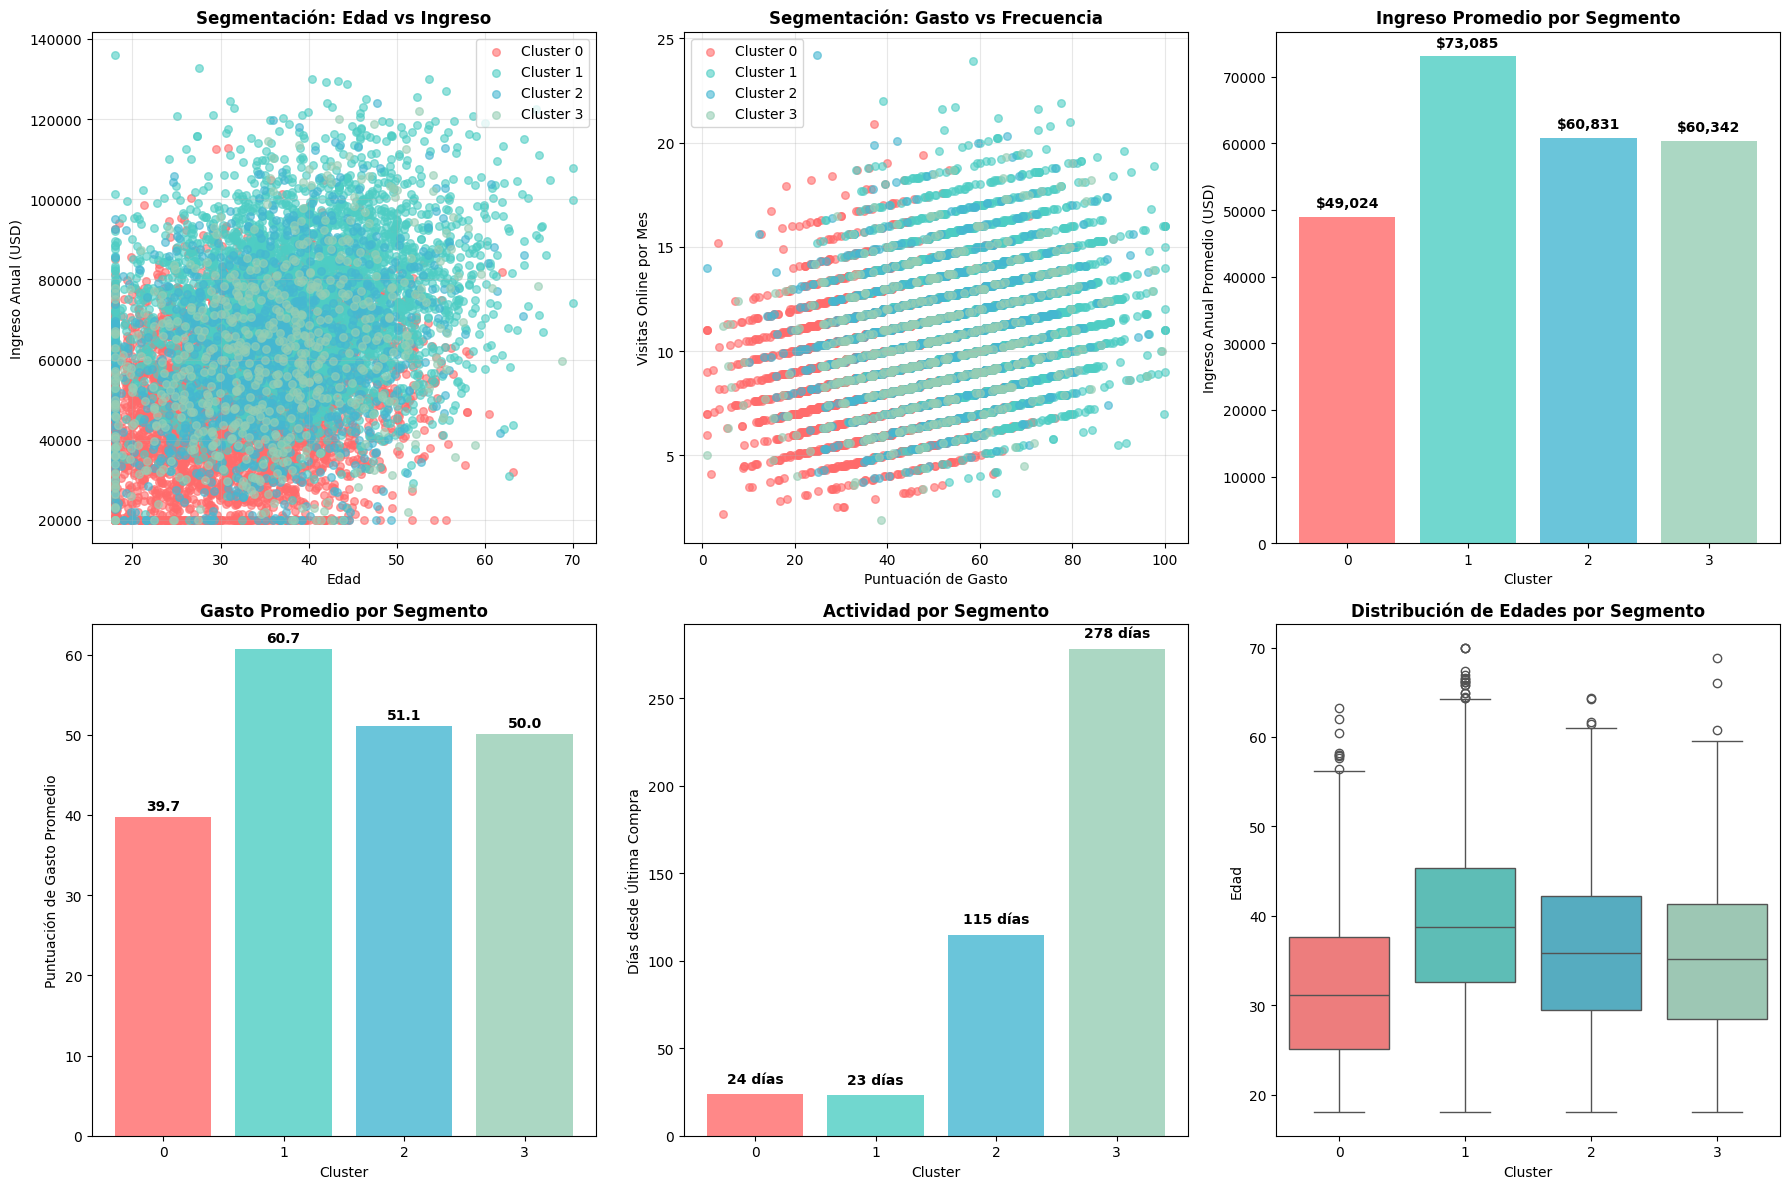

In [ ]:
# =============================================================================
# VISUALIZACIÓN MEJORADA DE LOS CLUSTERS
# =============================================================================

# Crear gráficos comparativos mejorados
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Mapa de segmentos - Ingreso vs Edad
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for cluster in sorted(customer_data['cluster'].unique()):
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    axes[0,0].scatter(cluster_data['age'], cluster_data['annual_income'],
                     alpha=0.6, s=30, color=colors[cluster],
                     label=f'Cluster {cluster}')

axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Ingreso Anual (USD)')
axes[0,0].set_title('Segmentación: Edad vs Ingreso', fontweight='bold', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Mapa de segmentos - Gasto vs Visitas
for cluster in sorted(customer_data['cluster'].unique()):
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    axes[0,1].scatter(cluster_data['spending_score'], cluster_data['online_visits_per_month'],
                     alpha=0.6, s=30, color=colors[cluster],
                     label=f'Cluster {cluster}')

axes[0,1].set_xlabel('Puntuación de Gasto')
axes[0,1].set_ylabel('Visitas Online por Mes')
axes[0,1].set_title('Segmentación: Gasto vs Frecuencia', fontweight='bold', fontsize=12)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Comparativa de ingresos por cluster
cluster_income = customer_data.groupby('cluster')['annual_income'].mean()
bars = axes[0,2].bar(range(len(cluster_income)), cluster_income.values, color=colors, alpha=0.8)
axes[0,2].set_xlabel('Cluster')
axes[0,2].set_ylabel('Ingreso Anual Promedio (USD)')
axes[0,2].set_title('Ingreso Promedio por Segmento', fontweight='bold', fontsize=12)
axes[0,2].set_xticks(range(len(cluster_income)))

# Añadir valores en las barras
for bar, value in zip(bars, cluster_income.values):
    axes[0,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                  f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Comparativa de gasto por cluster
cluster_spending = customer_data.groupby('cluster')['spending_score'].mean()
bars = axes[1,0].bar(range(len(cluster_spending)), cluster_spending.values, color=colors, alpha=0.8)
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Puntuación de Gasto Promedio')
axes[1,0].set_title('Gasto Promedio por Segmento', fontweight='bold', fontsize=12)
axes[1,0].set_xticks(range(len(cluster_spending)))

# Añadir valores en las barras
for bar, value in zip(bars, cluster_spending.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                  f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Actividad por cluster (días desde última compra)
cluster_activity = customer_data.groupby('cluster')['days_since_last_purchase'].mean()
bars = axes[1,1].bar(range(len(cluster_activity)), cluster_activity.values, color=colors, alpha=0.8)
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Días desde Última Compra')
axes[1,1].set_title('Actividad por Segmento', fontweight='bold', fontsize=12)
axes[1,1].set_xticks(range(len(cluster_activity)))

# Añadir valores en las barras
for bar, value in zip(bars, cluster_activity.values):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                  f'{value:.0f} días', ha='center', va='bottom', fontweight='bold')

# 6. Distribución de edades por cluster
sns.boxplot(data=customer_data, x='cluster', y='age', ax=axes[1,2], palette=colors)
axes[1,2].set_xlabel('Cluster')
axes[1,2].set_ylabel('Edad')
axes[1,2].set_title('Distribución de Edades por Segmento', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# RECOMENDACIONES ESTRATÉGICAS POR SEGMENTO
# =============================================================================

def generate_business_recommendations(profiles):
    print("\n RECOMENDACIONES ESTRATÉGICAS POR SEGMENTO:")
    print("="*70)

    for cluster, profile in profiles.items():
        print(f"\n{profile['nombre']}:")

        if "Jóvenes de Bajo Presupuesto" in profile['nombre']:
            print("   ESTRATEGIA: Cultivo y Fidelización Temprana")
            print("   ACCIONES: Programas de estudiantes, precios especiales, contenido educativo")
            print("   COMUNICACIÓN: Redes sociales, influencers, email marketing joven")
            print("   OBJETIVO: Convertirlos en clientes de por vida")

        elif "Compradores Establecidos" in profile['nombre']:
            print("   ESTRATEGIA: Retención y Maximización de Valor")
            print("   ACCIONES: Programa VIP, atención personalizada, productos premium")
            print("   COMUNICACIÓN: Email personalizado, ofertas exclusivas, early access")
            print("   OBJETIVO: Aumentar lifetime value y referrals")

        elif "Semi-activos" in profile['nombre']:
            print("   ESTRATEGIA: Reactivación y Re-enganche")
            print("   ACCIONES: Campañas de win-back, descuentos por retorno, recordatorios")
            print("   COMUNICACIÓN: 'Te extrañamos', ofertas personalizadas")
            print("   OBJETIVO: Recuperar antes de que se vuelvan inactivos")

        elif "Inactivos" in profile['nombre']:
            print("   ESTRATEGIA: Recuperación Agresiva")
            print("   ACCIONES: Ofertas muy agresivas, encuestas de satisfacción")
            print("   COMUNICACIÓN: Campañas de último intento, '¿Qué salió mal?'")
            print("   OBJETIVO: Recuperar al menos el 20% o identificar causas de abandono")

generate_business_recommendations(improved_profiles)


 RECOMENDACIONES ESTRATÉGICAS POR SEGMENTO:

 Jóvenes de Bajo Presupuesto:
   ESTRATEGIA: Cultivo y Fidelización Temprana
   ACCIONES: Programas de estudiantes, precios especiales, contenido educativo
   COMUNICACIÓN: Redes sociales, influencers, email marketing joven
   OBJETIVO: Convertirlos en clientes de por vida

 Compradores Establecidos:
   ESTRATEGIA: Retención y Maximización de Valor
   ACCIONES: Programa VIP, atención personalizada, productos premium
   COMUNICACIÓN: Email personalizado, ofertas exclusivas, early access
   OBJETIVO: Aumentar lifetime value y referrals

 Clientes Medianos Semi-activos:
   ESTRATEGIA: Reactivación y Re-enganche
   ACCIONES: Campañas de win-back, descuentos por retorno, recordatorios
   COMUNICACIÓN: 'Te extrañamos', ofertas personalizadas
   OBJETIVO: Recuperar antes de que se vuelvan inactivos

 Clientes Inactivos:
   ESTRATEGIA: Recuperación Agresiva
   ACCIONES: Ofertas muy agresivas, encuestas de satisfacción
   COMUNICACIÓN: Campañas de ú